In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as LE

# from sklearn.preprocessing import OneHotEncoder

In [2]:
39 % 12 + 1

4

Считываем набор данных и задаем название столбцов

In [4]:
df = pd.read_csv(
       'agaricus-lepiota.data',
       names=['class', 'cap-shape', 'cap-surface', 'cap-color',
                        'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                        'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
                        'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'],
                 header=None)
# df['class'].unique()

## Определяем класс Наивного Байеса с методами fit и predict

In [5]:
class NB:
    def __init__(self, classes):
        # При создании объекта класса определяем все переменные
        self.classes = classes
        self.n_class_items = {}
        self.feat_counts = {}
        self.class_priors = {}

    def fit(self, X, y):
        n = len(X)
        grouped = dict() # группируем данные для удобства
        for c in self.classes:
            grouped[c] = X[np.where(y == c)]

        for c, data in grouped.items():
            self.n_class_items[c] = len(data)
            self.class_priors[c] = (self.n_class_items[c] / n)
            self.feat_counts[c] = np.sum(data, axis=0)
        # возвращаем уже обученную модель
        return self

    def predict(self, X):  # предсказывает по набору входных данных метки класса
        # print(self.feat_counts[self.classes[0]])
        result = []
        for row_idx in range(X.shape[0]):
            class_scores = {c: self.class_priors[c] for c in
                            self.classes}  # для каждого объекта возвращаем вероястности классов к изначальным значениям
            for column_idx in range(X.shape[1]):
                for c in self.classes:
                    if X[row_idx][column_idx] == 0:  # X состоит только из 0 и 1
                        continue
                    prob_w_given_c = (self.feat_counts[c][column_idx] + 1) / (
                          X.shape[0])  # вероятности считаем как частоты появлений соотв. 1 в признаках
                    class_scores[c] *= prob_w_given_c
            result.append(max(class_scores,
                              key=class_scores.get))  # добавляем в возвращаемый массив метку класса с наибольшей вероятностью
        return result

С помощью Label Encoder кодируем строки числами

In [6]:
mushrooms_df = df.loc[:, ['veil-type', 'veil-color',
                          'ring-number', 'ring-type', 'spore-print-color', 'class']]
le_1 = LE()
mushrooms_df['veil-type'] = le_1.fit_transform(mushrooms_df['veil-type'])
le_2 = LE()
mushrooms_df['veil-color'] = le_2.fit_transform(mushrooms_df['veil-color'])
le_3 = LE()
mushrooms_df['ring-number'] = le_3.fit_transform(mushrooms_df['ring-number'])
le_4 = LE()
mushrooms_df['ring-type'] = le_4.fit_transform(mushrooms_df['ring-type'])
le_5 = LE()
mushrooms_df['spore-print-color'] = le_5.fit_transform(mushrooms_df['spore-print-color'])

Для определения самого информативного признака создаем список датафреймов

In [7]:
df_list = [df.loc[:, ['veil-type', 'class']],
           df.loc[:, ['veil-color', 'class']],
           df.loc[:, ['ring-number', 'class']],
           df.loc[:, ['ring-type', 'class']],
           df.loc[:, ['spore-print-color', 'class']]]

In [8]:
acc_diffs = []
for df in df_list:
    label_encoder = LE()
    df.iloc[:, 0] = label_encoder.fit_transform(df.iloc[:, 0])
    train_data, test_data = train_test_split(df, test_size=0.3,random_state=42)

    y_train = train_data['class']
    y_test = test_data['class']
    X_train = train_data.drop(['class'], axis=1)
    X_test = test_data.drop(['class'], axis=1)
    X_train = pd.get_dummies(X_train, columns=[df.columns[0]])
    X_test = pd.get_dummies(X_test, columns=[df.columns[0]])
    X_train, X_test = X_train.values, X_test.values

    model = NB(classes=np.unique(y_train)).fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    acc_diffs.append(acc_train - acc_test)
    print(f'Точность NB по признаку на обучающей выборке {df.columns[0]}:\t{acc_train}')
    print(f'Точность NB по признаку на тестовой выборке {df.columns[0]}:\t{acc_test}')

print(f"Точность на обучающей выборке выше точности на тестовой на:{np.array(acc_diffs).mean() * 100:.2f}%")

Точность NB по признаку на обучающей выборке veil-type:	0.5189940204009849
Точность NB по признаку на тестовой выборке veil-type:	0.5155865463494668
Точность NB по признаку на обучающей выборке veil-color:	0.5202251143158635
Точность NB по признаку на тестовой выборке veil-color:	0.5159967186218212
Точность NB по признаку на обучающей выборке ring-number:	0.5240942666197679
Точность NB по признаку на тестовой выборке ring-number:	0.5184577522559475
Точность NB по признаку на обучающей выборке ring-type:	0.7762926486106225
Точность NB по признаку на тестовой выборке ring-type:	0.7735849056603774
Точность NB по признаку на обучающей выборке spore-print-color:	0.8673935983116426
Точность NB по признаку на тестовой выборке spore-print-color:	0.8695652173913043
Точность на обучающей выборке выше точности на тестовой на:0.28%


Видим что признак spore-print-color являетса самым информативным.

1
1


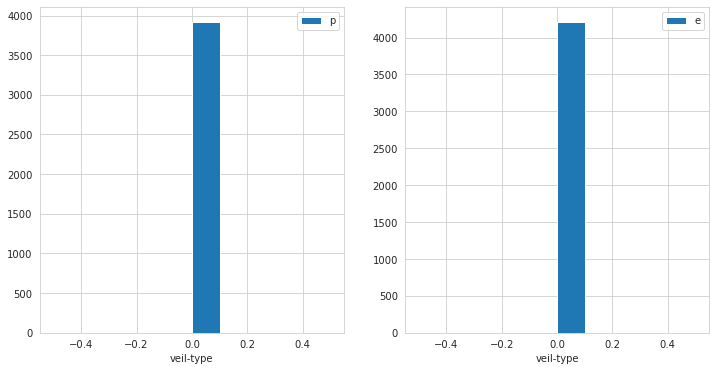

2
3


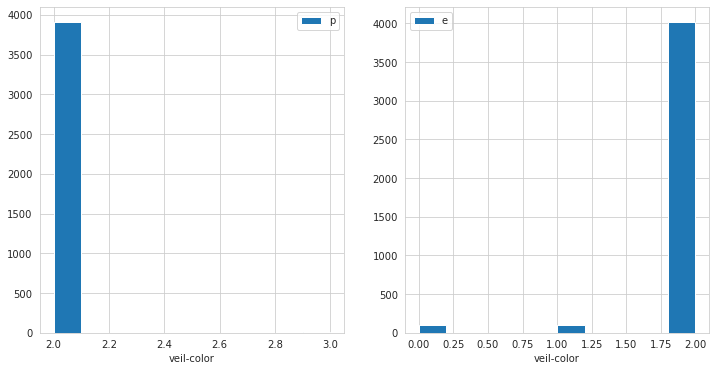

3
2


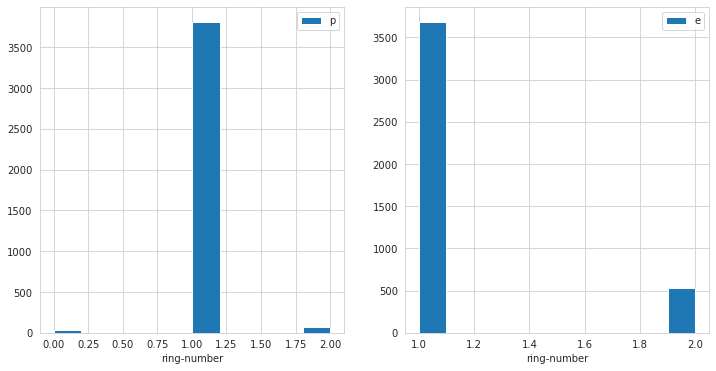

4
3


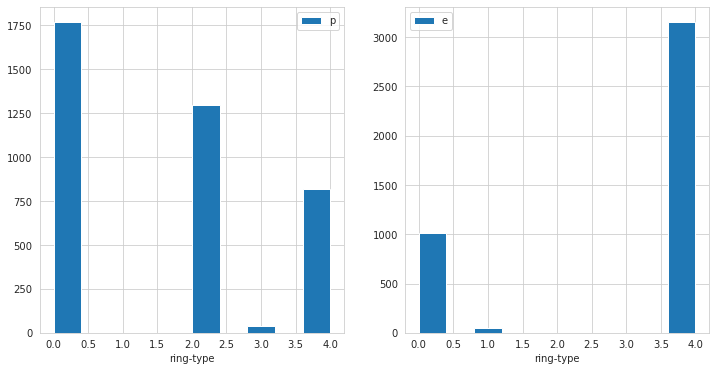

5
8


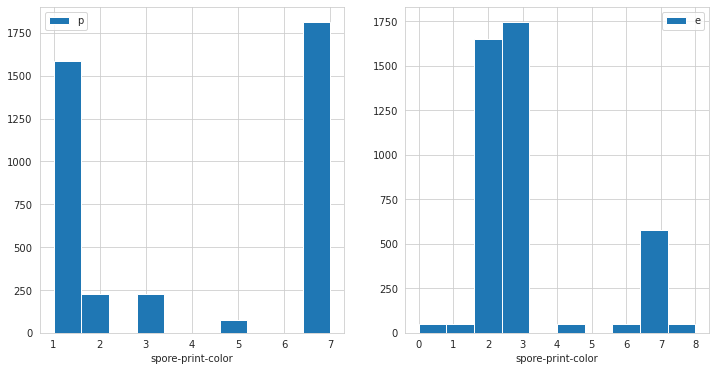

In [9]:
# mushrooms_df.groupby('class').hist(figsize=(15,15))
l = False
for col in mushrooms_df.drop('class',axis=1).columns:
    plt.figure(figsize=(12, 6)) 
    for cl in mushrooms_df['class'].unique():
        plt.subplot(1,2, int(l) + 1)
        n_unique = len(mushrooms_df[mushrooms_df['class'] == cl][col].unique())
        plt.hist(mushrooms_df[mushrooms_df['class'] == cl][col])
        plt.xlabel(col)
        plt.legend(cl)
        print(n_unique)
        l =  not l
    plt.show()

In [10]:
mushrooms_df = pd.get_dummies(mushrooms_df, columns=['veil-type', 'veil-color',
                                                     'ring-number', 'ring-type', 'spore-print-color'])


In [11]:
len(X_train)

5686

In [12]:
train_data, test_data = train_test_split(mushrooms_df, test_size=0.3, random_state=42)

y_train = train_data['class'].values
X_train = train_data.drop('class', axis=1).values

y_test = test_data['class'].values
X_test = test_data.drop('class', axis=1).values

nb_custom = NB(classes=np.unique(y_train)).fit(X_train, y_train)

In [13]:
y_pred = np.array(nb_custom.predict(X_test))

In [14]:
from sklearn.metrics import accuracy_score

own = accuracy_score(y_test, y_pred)

own

0.9343724364232978

In [15]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB

In [16]:
mnb = MultinomialNB(alpha=0.0).fit(X_train, y_train)

/home/limp/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [17]:
y_pred2 = mnb.predict(X_test)

In [18]:
vstr = accuracy_score(y_test, y_pred2)
vstr

0.9343724364232978

In [19]:
vstr - own

0.0